In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [5]:
data = pd.read_csv("heart_disease.csv")

In [7]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [15]:
# Task 2: Exploratory Data Analysis (EDA)
# Check for missing values and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 64.8+ KB
None


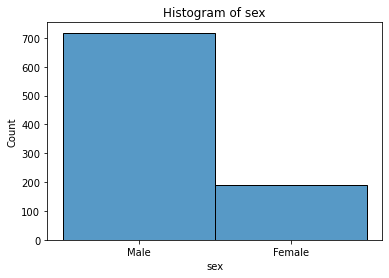

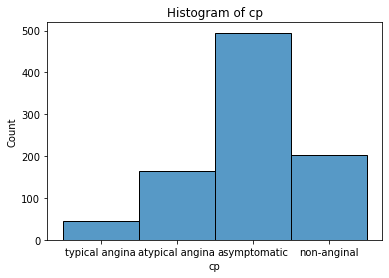

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


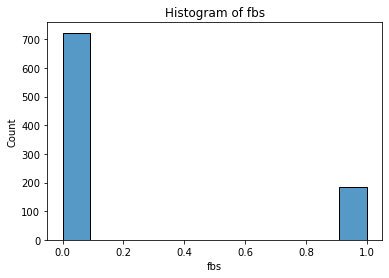

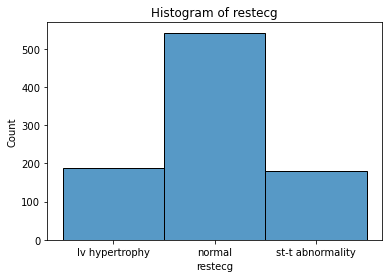

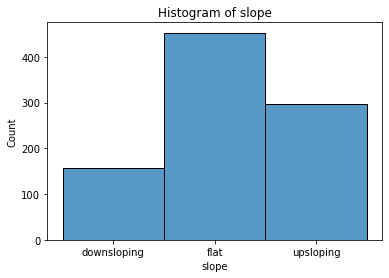

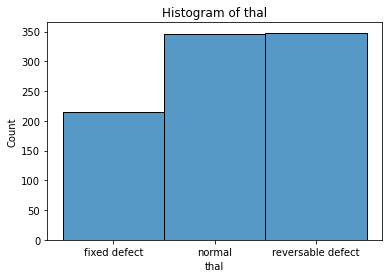

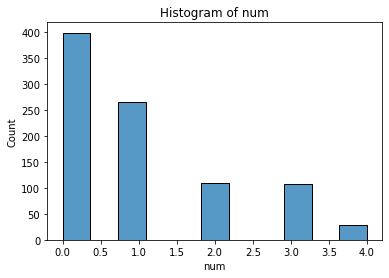

In [17]:
sns_plot_col= ['sex','cp','fbs','restecg','slope','thal','num']
for i in sns_plot_col:
    sns.histplot(data=data, x=i)
    plt.title(f'Histogram of {i}')
    plt.show()

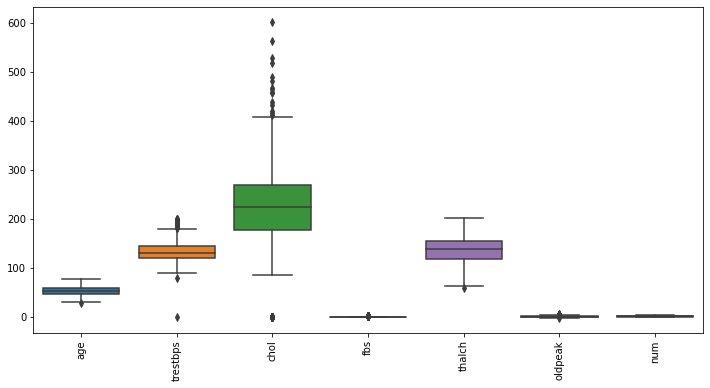

In [18]:
# Box plots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

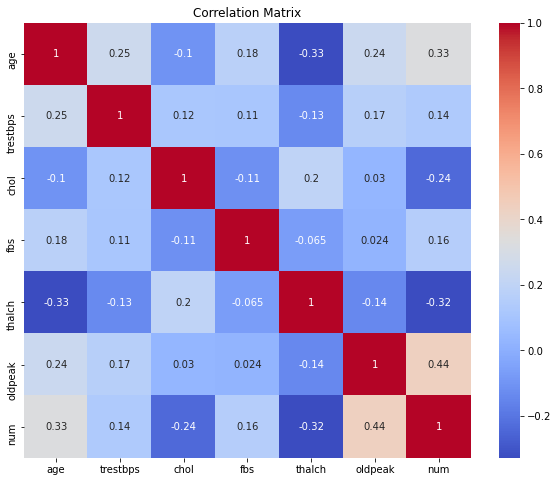

In [19]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
data['oldpeak'].value_counts()

 0.0    358
 1.0     83
 2.0     76
 1.5     48
 3.0     28
 0.5     19
 1.2     17
 2.5     16
 1.4     15
 0.8     15
 0.2     14
 1.6     14
 0.6     14
 1.8     12
 0.4     10
 0.1      9
 4.0      8
 2.8      7
 2.6      7
 2.2      5
 0.7      5
 1.3      5
 1.9      5
 0.3      5
 0.9      4
 2.4      4
 1.1      4
 3.6      4
 3.4      3
 2.1      2
 4.2      2
-0.5      2
 2.3      2
 3.5      2
 1.7      2
 3.2      2
-1.0      2
-0.9      1
 3.8      1
-0.7      1
-1.5      1
 3.1      1
 5.0      1
-2.0      1
-1.1      1
-2.6      1
-0.8      1
-0.1      1
 2.9      1
 6.2      1
 5.6      1
 4.4      1
 3.7      1
Name: oldpeak, dtype: int64

In [34]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [35]:
data.shape

(908, 13)

In [36]:
data['num'].value_counts()

0    399
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [40]:
data['oldpeak'].median()

0.5

In [44]:
data.median()

age          54.0
trestbps    130.0
chol        224.0
fbs           0.0
thalch      138.0
oldpeak       0.5
num           1.0
dtype: float64

In [46]:
data['age'].value_counts()

54    51
58    43
55    41
56    38
57    38
52    36
62    35
51    35
59    35
53    33
60    32
61    31
48    31
63    30
50    25
46    24
41    24
43    24
64    22
49    22
65    21
47    19
44    19
45    18
42    18
38    16
67    15
39    15
66    13
40    13
69    13
37    11
68    10
35     9
74     7
70     7
36     6
71     5
72     4
34     4
75     3
32     2
31     2
77     2
76     2
33     1
73     1
30     1
29     1
Name: age, dtype: int64

In [49]:
data[data['oldpeak'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,FALSE,NaN,upsloping,fixed defect,0
371,55,Male,atypical angina,110,214,True,st-t abnormality,180,FALSE,NaN,flat,normal,0
380,69,Male,non-anginal,175,271,False,lv hypertrophy,82,FALSE,NaN,upsloping,normal,0
381,51,Male,asymptomatic,133,218,True,lv hypertrophy,156,TURE,NaN,upsloping,fixed defect,0
382,58,Male,asymptomatic,131,385,True,lv hypertrophy,126,TURE,NaN,flat,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,69,Male,asymptomatic,154,289,True,st-t abnormality,128,TURE,NaN,flat,normal,3
878,64,Male,asymptomatic,134,306,True,st-t abnormality,73,TURE,NaN,upsloping,normal,3
879,60,Male,non-anginal,186,316,True,st-t abnormality,70,TURE,NaN,flat,reversable defect,3
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [50]:
data['exang'].value_counts()

FALSE    535
TRUE     337
TURE      36
Name: exang, dtype: int64

In [51]:
data['oldpeak'].fillna(data['oldpeak'].median(),inplace=True)

In [53]:
data[data['oldpeak'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


In [57]:
data['exang'].replace({'TURE': True, 'FALSE': False},inplace=True)
data['exang'].value_counts()

False    535
TRUE     337
True      36
Name: exang, dtype: int64

In [58]:
data['fbs']= data['fbs'].astype(object)
     

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [62]:
features= data.drop('num',axis=1)
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,0.5,downsloping,normal


In [63]:
target= data[['num']]

In [85]:
features = pd.get_dummies(features,dtype=int)
features

,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,restecg_st-t abnormality,exang_False,exang_True,exang_TRUE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,41,135,203,132,0.0,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,57,140,192,148,0.4,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3,52,118,186,190,0.0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,57,110,201,126,1.5,0,1,1,0,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,120,1.5,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,1
904,62,166,170,120,3.0,0,1,1,0,0,...,1,0,0,1,0,1,0,0,0,1
905,56,170,0,123,2.5,0,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
906,56,144,208,105,0.5,0,1,0,0,1,...,1,0,1,0,1,0,0,0,1,0


In [86]:
features.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'sex_Female',
       'sex_Male', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'fbs_False', 'fbs_True', 'restecg_lv hypertrophy',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_False',
       'exang_True', 'exang_TRUE', 'slope_downsloping', 'slope_flat',
       'slope_upsloping', 'thal_fixed defect', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

In [87]:
x_train,x_test,y_train,y_test= train_test_split(features,target,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test

(     age  trestbps  chol  thalch  oldpeak  sex_Female  sex_Male  \
 84    42       120   295     162      0.0           0         1   
 10    30       170   237     170      0.0           1         0   
 617   74       140   237      94      0.0           0         1   
 250   41       104     0     111      0.0           0         1   
 869   49       137   142      68      0.5           0         1   
 ..   ...       ...   ...     ...      ...         ...       ...   
 106   63       135   252     172      0.0           1         0   
 270   37       120   260     130      0.0           1         0   
 860   48       140   374     159      1.5           0         1   
 435   57       154   232     164      0.0           0         1   
 102   60       150   240     171      0.9           1         0   
 
      cp_asymptomatic  cp_atypical angina  cp_non-anginal  ...  \
 84                 0                   1               0  ...   
 10                 0                   0         

In [76]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(726, 25)
(726, 1)
(182, 25)
(182, 1)


In [88]:
dec_tree= DecisionTreeClassifier()
params= {'criterion': ['gini', 'entropy'],
         'splitter': ['best', 'random'],
         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]}

In [89]:
grid_search_params= GridSearchCV(dec_tree, param_grid=params, verbose=2, error_score='raise')
grid_search_params

GridSearchCV(error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']},
             verbose=2)

In [90]:
grid_search_params.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] criterion=gini, max_depth=1, splitter=best ......................
[CV] ....... criterion=gini, max_depth=1, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, splitter=best ......................
[CV] ....... criterion=gini, max_depth=1, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, splitter=best ......................
[CV] ....... criterion=gini, max_depth=1, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, splitter=best ......................
[CV] ....... criterion=gini, max_depth=1, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, splitter=best ......................
[CV] ....... criterion=gini, max_depth=1, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, splitter=random ....................
[CV] ..... criterion=gini, max_depth=1, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=1, splitter=random ....................
[CV] ..... crit

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..... criterion=gini, max_depth=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=random ....................
[CV] ..... criterion=gini, max_depth=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=random ....................
[CV] ..... criterion=gini, max_depth=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=random ....................
[CV] ..... criterion=gini, max_depth=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=random ....................
[CV] ..... criterion=gini, max_depth=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, splitter=best ......................
[CV] ....... criterion=gini, max_depth=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, splitter=best ......................
[CV] ....... criterion=gini, max_depth=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, splitter=best ......................
[CV] .

[CV] .. criterion=entropy, max_depth=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=1, splitter=random .................
[CV] .. criterion=entropy, max_depth=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=1, splitter=random .................
[CV] .. criterion=entropy, max_depth=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=1, splitter=random .................
[CV] .. criterion=entropy, max_depth=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=1, splitter=random .................
[CV] .. criterion=entropy, max_depth=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=2, splitter=best ...................
[CV] .... criterion=entropy, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=2, splitter=best ...................
[CV] .... criterion=entropy, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=2, splitter=best ...................
[CV] .

[CV] .... criterion=entropy, max_depth=8, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, splitter=best ...................
[CV] .... criterion=entropy, max_depth=8, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, splitter=best ...................
[CV] .... criterion=entropy, max_depth=8, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, splitter=best ...................
[CV] .... criterion=entropy, max_depth=8, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, splitter=random .................
[CV] .. criterion=entropy, max_depth=8, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, splitter=random .................
[CV] .. criterion=entropy, max_depth=8, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, splitter=random .................
[CV] .. criterion=entropy, max_depth=8, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, splitter=random .................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    2.4s finished


GridSearchCV(error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']},
             verbose=2)

In [91]:
grid_search_params.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'random'}

In [92]:
dec_tree_params= DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=4)
dec_tree_params

DecisionTreeClassifier(max_depth=4, splitter='random')

In [93]:
dec_tree_params.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, splitter='random')

In [94]:
y_pred= dec_tree_params.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       2, 1, 0, 1, 1, 0], dtype=int64)

In [95]:
accuracy_score(y_test,y_pred)


0.5769230769230769

In [96]:
dec_tree_manual= DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)
dec_tree_manual

DecisionTreeClassifier(max_depth=3)

In [97]:
dec_tree_manual.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [98]:
y_pred_manual= dec_tree_manual.predict(x_test)
y_pred_manual

array([1, 1, 0, 3, 1, 3, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 3, 0, 0, 0, 0, 1, 3, 0, 1, 0, 0, 3, 1, 0, 3, 1, 0, 1, 0, 0, 0,
       1, 0, 3, 0, 0, 3, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 1, 1, 0, 1,
       1, 0, 1, 3, 0, 3, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 3, 1, 0, 1, 0, 1, 0, 3,
       0, 1, 3, 1, 1, 0], dtype=int64)

In [99]:
accuracy_score(y_test,y_pred_manual)

0.5714285714285714

In [100]:
print(classification_report(y_test,y_pred_manual))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78        89
           1       0.43      0.50      0.46        48
           2       0.00      0.00      0.00        22
           3       0.21      0.24      0.22        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.27      0.32      0.29       182
weighted avg       0.48      0.57      0.52       182



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


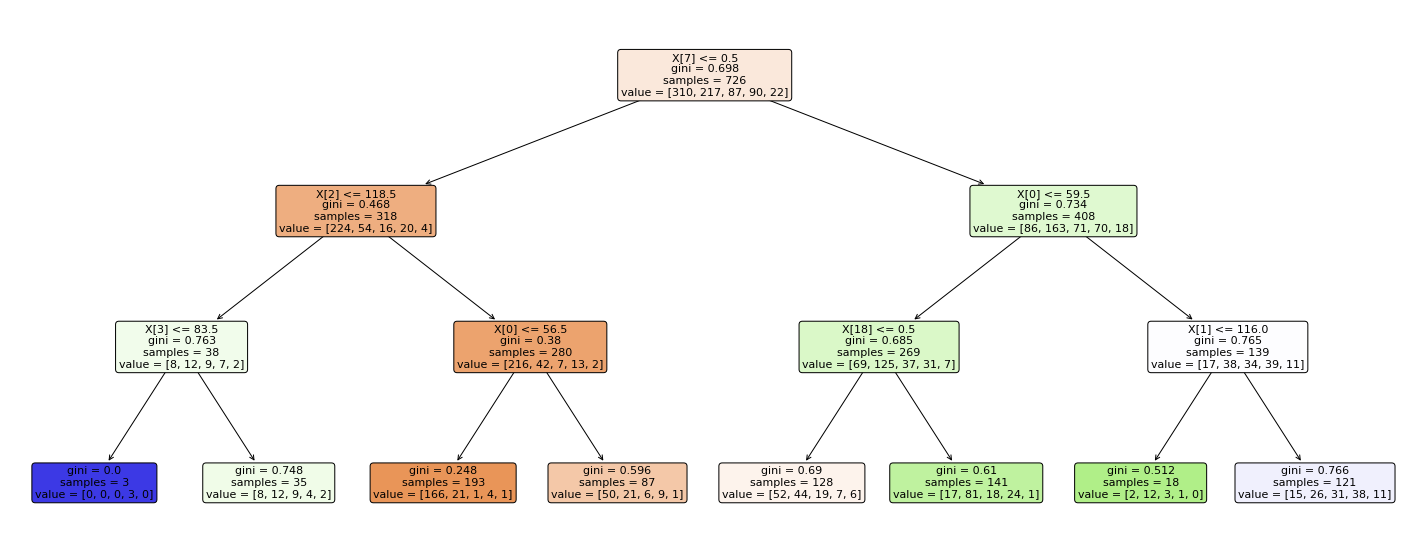

In [101]:
plt.figure(figsize=(25,10))
plot_tree(dec_tree_manual, filled=True, rounded=True);

In [102]:
dec_tree_manual_1= DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=4)
dec_tree_manual_1.fit(x_train,y_train)
y_pred_manual_1= dec_tree_manual_1.predict(x_test)
accuracy_score(y_test,y_pred_manual_1)

0.5769230769230769

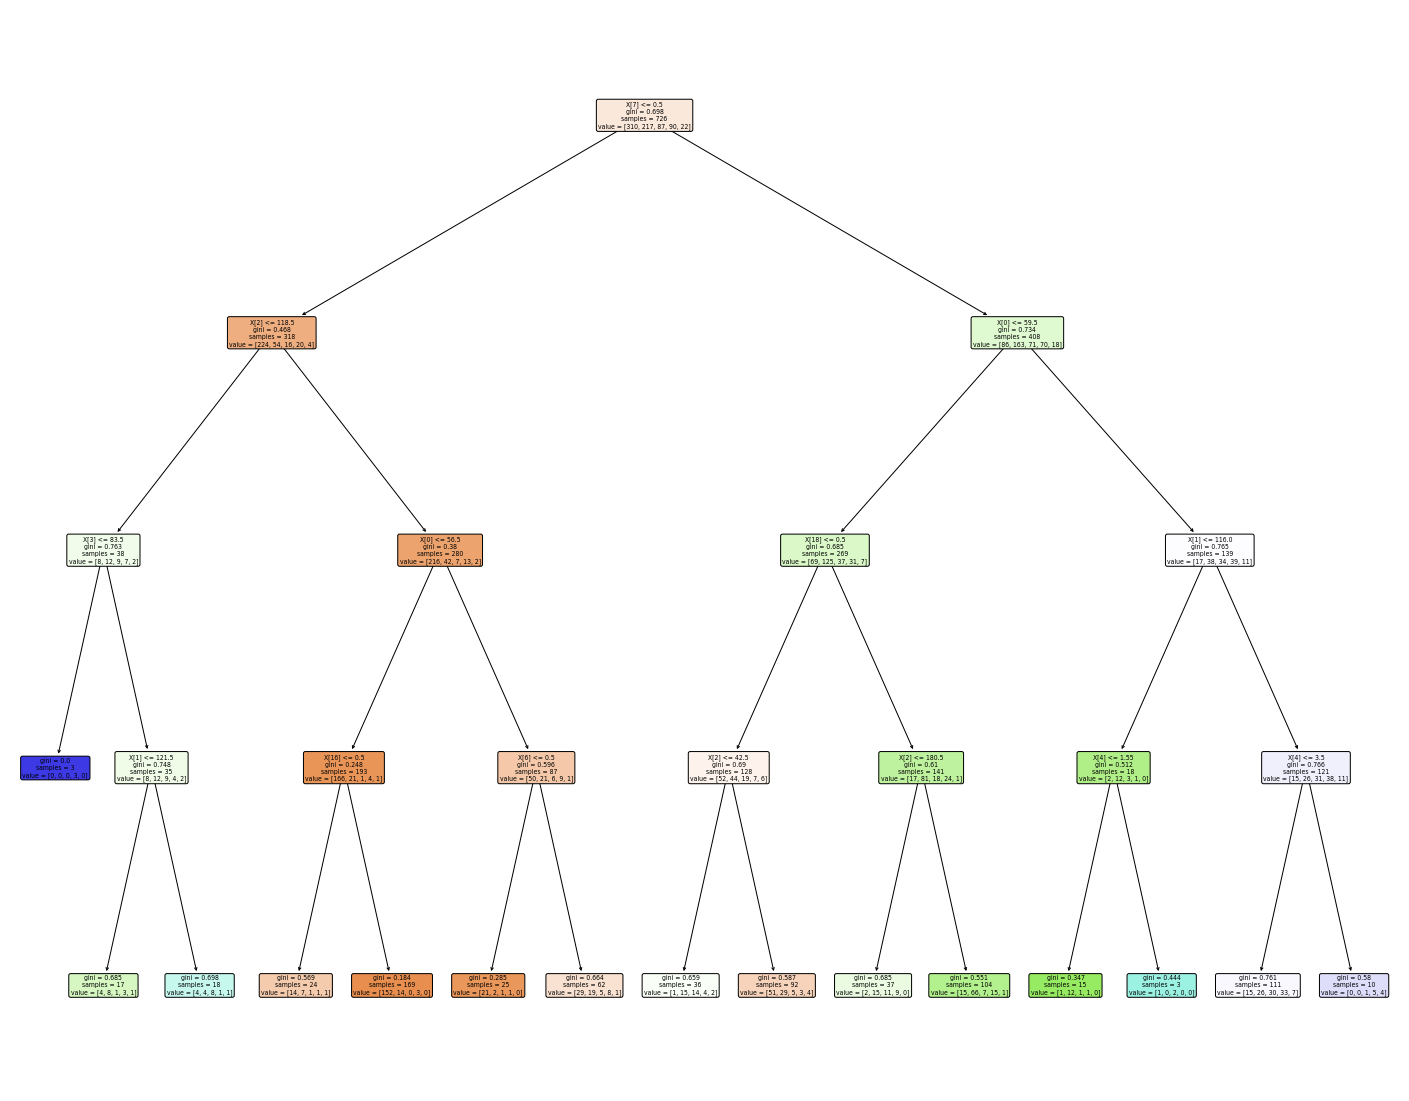

In [103]:
plt.figure(figsize=(25,20))
plot_tree(dec_tree_manual_1,filled=True, rounded=True);

In [104]:
dec_tree_manual_1= DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=2)
dec_tree_manual_1.fit(x_train,y_train)
y_pred_manual_1= dec_tree_manual_1.predict(x_test)
accuracy_score(y_test,y_pred_manual_1)

0.5879120879120879

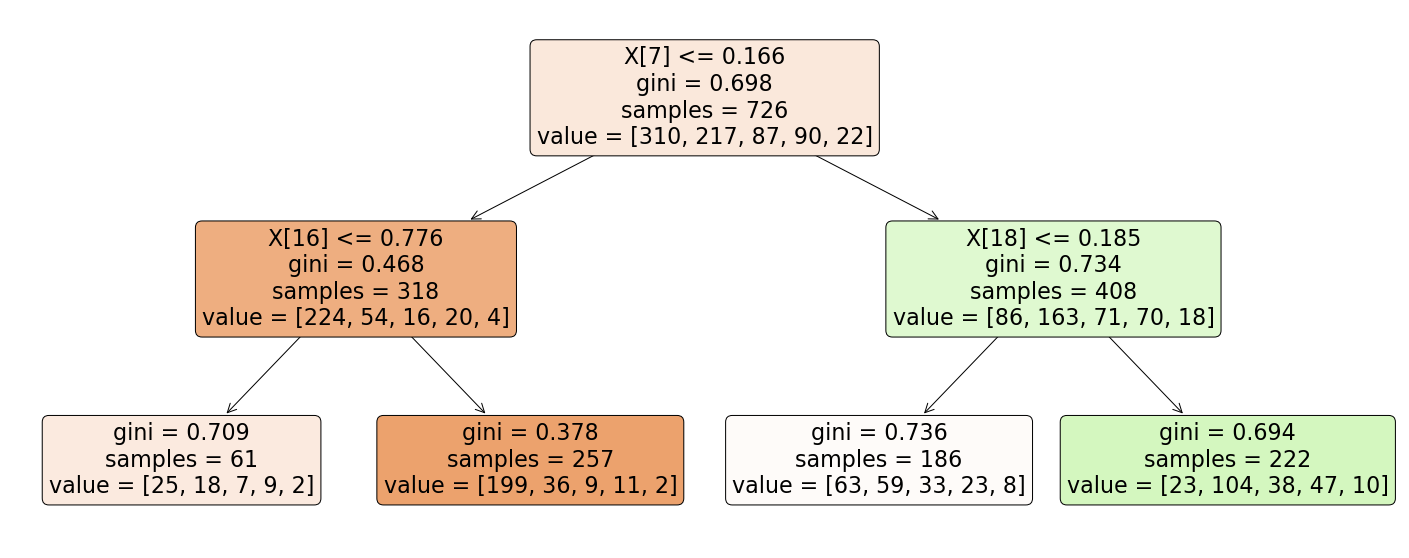

In [105]:
plt.figure(figsize=(25,10))
plot_tree(dec_tree_manual_1,filled=True, rounded=True);

In [106]:
dec_tree_manual_1= DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=2)
dec_tree_manual_1.fit(x_train,y_train)
y_pred_manual_1= dec_tree_manual_1.predict(x_test)
accuracy_score(y_test,y_pred_manual_1)

0.554945054945055

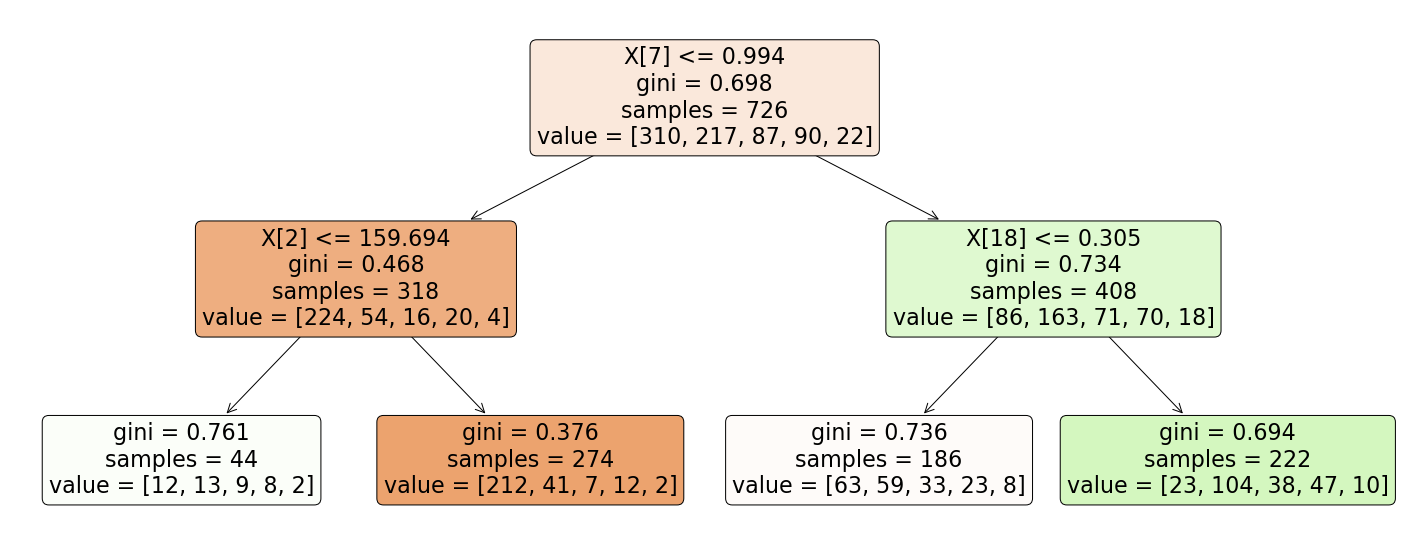

In [107]:
plt.figure(figsize=(25,10))
plot_tree(dec_tree_manual_1,filled=True, rounded=True);

INTERVIEW QUESTIONS


In [ ]:
""""""

Common Hyperparameters of Decision Trees:
    
max_depth: Controls the depth of the tree. A shallow tree might underfit, while a deep tree might overfit.
    
min_samples_split: Minimum samples required to split an internal node. Controls model complexity.
    
criterion: The function to measure the quality of a split (e.g., 'gini', 'entropy').

    
2. Difference Between Label Encoding and One-hot Encoding

    
Label Encoding vs. One-Hot Encoding:
Label Encoding assigns a unique integer to each category. It is best for ordinal data where the order matters.


One-Hot Encoding creates binary columns for each category, which is better for nominal (unordered) categorical variables.


""""""
